In [85]:
import mogptk

m1_real=mogptk.LoadModel("first_real")
m2_real=mogptk.LoadModel('second_real')
m3_real=mogptk.LoadModel('third_real')
m4_real=mogptk.LoadModel('fourth_real')
m1_im=mogptk.LoadModel('first_im')
m2_im=mogptk.LoadModel('second_im')
m3_im=mogptk.LoadModel('third_im')
m4_im=mogptk.LoadModel('fourth_im')

In [86]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from scipy.fft import rfft, rfftfreq

In [87]:
def func1(t):
    return torch.tensor([np.sin(t)+ np.cos(t**2)+ max(30,t) ])

def func2(t):
    return (torch.relu(func1(t))+ torch.sigmoid(func1(t)))

In [88]:
num_training_samples=50
length=6

x_train=[]
for i in range(num_training_samples):
    index=i+i*6+12
    x_train.append(np.linspace(index, index+6, 6))

In [89]:
print(x_train[49])

[355.  356.2 357.4 358.6 359.8 361. ]


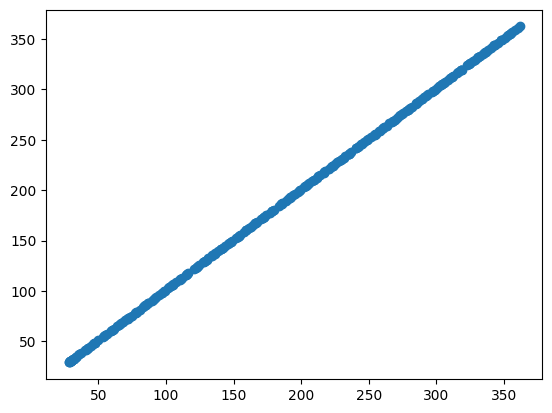

In [90]:
f1=[]
f2=[]
for i in x_train:
    values1=[]
    values2=[]
    for index in i:
        values1.append(func1(index).item())
        values2.append(func2(index).item())
    f1.append(values1)
    f2.append(values2)
    
flat_x=[   x for xs in f1 for x in xs  ]
flat_y=[ x for xs in f2 for x in xs  ]
plt.scatter(flat_x, flat_y)


In [91]:
print(f1[0], f1[1])
print(flat_x[:11])

[30.334574483031908, 30.473957625470657, 31.965546999020255, 29.994566085484703, 29.988409922702452, 28.33428257529295] [29.18969850064932, 31.909212376829082, 31.314027048715364, 29.17951388263609, 29.60717898425181, 28.88326099292575]
[30.334574483031908, 30.473957625470657, 31.965546999020255, 29.994566085484703, 29.988409922702452, 28.33428257529295, 29.18969850064932, 31.909212376829082, 31.314027048715364, 29.17951388263609, 29.60717898425181]


In [92]:
torch.sigmoid(torch.Tensor([0.6]))

tensor([0.6457])

In [93]:
f1_real=[]
f1_imag=[]
f2_real=[]
f2_imag=[]
for i in range(num_training_samples):
    value1=rfft(f1[i])
    value2=rfft(f2[i])
    f1_real.append([i.real for i in value1])
    f1_imag.append([i.imag for i in value1])

    f2_real.append([i.real for i in value2])
    f2_imag.append([i.imag for i in value2])
    
    
x_train_real=torch.tensor(np.asarray(f1_real))
x_train_imag=torch.tensor(np.asarray(f1_imag)[:,1:3])



In [94]:
_,real,_,_=m1_real.predict(x_train_real)
_,real2,_,_=m2_real.predict(x_train_real)
_,real3,_,_=m3_real.predict(x_train_real)
_,real4,_,_=m4_real.predict(x_train_real)

_,im1,_,_=m1_im.predict(x_train_imag)
_,im2,_,_=m2_im.predict(x_train_imag)
_,im3,_,_=m3_im.predict(x_train_imag)
_,im4,_,_=m4_im.predict(x_train_imag)

In [95]:
(real[0])

1685.4786851103645

In [96]:
3+1j*2

(3+2j)

In [97]:
first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real,im1):
    first.append(r+1j*im)
for r, im in zip(real2,im2):
    second.append(r+1j*im)
for r, im in zip(real3,im3):
    third.append(r+1j*im) 
for r, im in zip(real4,im4):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result)    

In [98]:
result.shape

(50, 4)

In [99]:
from scipy.fft import irfft
values=irfft(result,axis= 1)

In [100]:
values.shape

(50, 6)

In [101]:
x_train=np.asarray(x_train)

In [102]:
values2=values.flatten()
x_points=x_train.flatten()

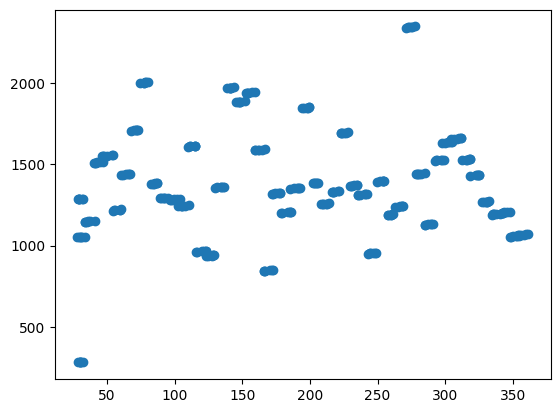

In [103]:
plt.scatter(flat_x, values2)

In [104]:
test=np.asarray([[1,2,3,9,12,10], [4,5,6,8,11,2]])

In [105]:
p=rfft(test,axis=1)

In [106]:
p.shape

(2, 4)

In [107]:
irfft(p,axis=1)

array([[ 1.,  2.,  3.,  9., 12., 10.],
       [ 4.,  5.,  6.,  8., 11.,  2.]])

In [108]:
test[:, 1:3]

array([[2, 3],
       [5, 6]])

In [109]:
test.flatten()

array([ 1,  2,  3,  9, 12, 10,  4,  5,  6,  8, 11,  2])

In [110]:
# this section is for the cutom kernels and not sm kernels

In [111]:
model1_k_real=mogptk.LoadModel("first_real_kernel")
model2_k_real=mogptk.LoadModel("second_real_kernel")
model3_k_real=mogptk.LoadModel("third_real_kernel")
model4_k_real=mogptk.LoadModel("fourth_real_kernel")

model1_k_imag=mogptk.LoadModel("first_im_kernel")
model2_k_imag=mogptk.LoadModel("second_im_kernel")
model3_k_imag=mogptk.LoadModel("third_im_kernel")
model4_k_imag=mogptk.LoadModel("fourth_im_kernel")

In [112]:
_,real_k,_,_=model1_k_real.predict(x_train_real)
_,real2_k,_,_=model2_k_real.predict(x_train_real)
_,real3_k,_,_=model3_k_real.predict(x_train_real)
_,real4_k,_,_=model4_k_real.predict(x_train_real)

_,im1_k,_,_=model1_k_imag.predict(x_train_imag)
_,im2_k,_,_=model2_k_imag.predict(x_train_imag)
_,im3_k,_,_=model3_k_imag.predict(x_train_imag)
_,im4_k,_,_=model4_k_imag.predict(x_train_imag)

In [113]:
first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real_k,im1_k):
    first.append(r+1j*im)
for r, im in zip(real2_k,im2_k):
    second.append(r+1j*im)
for r, im in zip(real3_k,im3_k):
    third.append(r+1j*im) 
for r, im in zip(real4_k,im4_k):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result)    

In [114]:
from scipy.fft import irfft
values=irfft(result,axis= 1)
x_train=np.asarray(x_train)

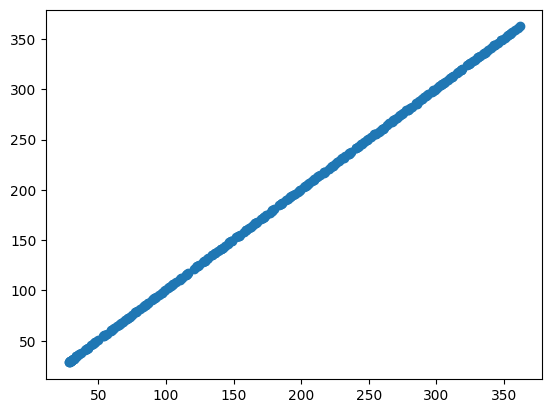

In [115]:
values2=values.flatten()
x_points=x_train.flatten()
plt.scatter(flat_x, values2)

In [116]:
model_lmc_real=mogptk.LoadModel("model_real_convolved")
model_lmc_imag=mogptk.LoadModel("model_imag_convolved")

In [117]:
_,real_lmc,_,_=model_lmc_real.predict(x_train_real)
_,imag_lmc,_,_=model_lmc_imag.predict(x_train_imag)

In [118]:
len(real_lmc)

4

In [119]:
result=[]
for r1, im1, r2,im2, r3,im3,r4,im4 in zip(real_lmc[0], imag_lmc[0], real_lmc[1], imag_lmc[1],real_lmc[2], imag_lmc[2], real_lmc[3], imag_lmc[3]):
    result.append([r1+1j*im1, r2+ 1j*im2, r3+1j*im3, r4+ 1j*im4])

In [120]:
len(result)

50

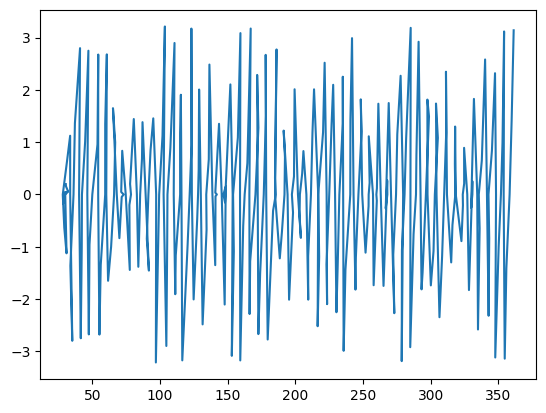

In [121]:
prediction=irfft(np.asarray(result), axis=1)
prediction_flat=prediction.flatten()
plt.plot(flat_x, prediction_flat)

In [122]:
def func3(t):
    return (torch.tanh(func1(t))+ torch.sigmoid(func1(t))+torch.log(func1(t)/13)+torch.sin(func1(t)**2))

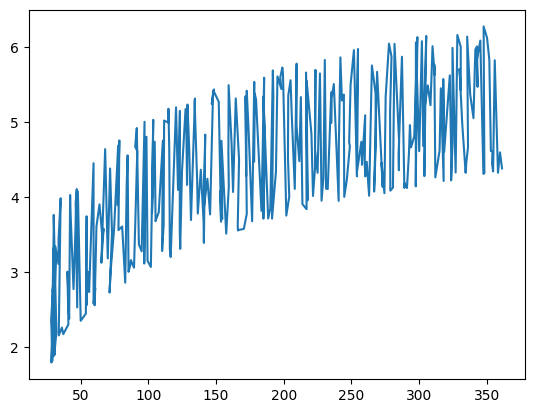

In [123]:
f3=[]

for i in x_train:
    values1=[]
    for index in i:
        values1.append(func3(index).item())
   
    f3.append(values1)

    

flat_y3=[ x for xs in f3 for x in xs  ]
plt.plot(flat_x, flat_y3)

In [124]:
model1_k_real2=mogptk.LoadModel("first_real_kernel2")
model2_k_real2=mogptk.LoadModel("second_real_kernel2")
model3_k_real2=mogptk.LoadModel("third_real_kernel2")
model4_k_real2=mogptk.LoadModel("fourth_real_kernel2")

model1_k_imag2=mogptk.LoadModel("first_im_kernel2")
model2_k_imag2=mogptk.LoadModel("second_im_kernel2")
model3_k_imag2=mogptk.LoadModel("third_im_kernel2")
model4_k_imag2=mogptk.LoadModel("fourth_im_kernel2")

In [125]:
_,real_k2,_,_=model1_k_real2.predict(x_train_real)
_,real2_k2,_,_=model2_k_real2.predict(x_train_real)
_,real3_k2,_,_=model3_k_real2.predict(x_train_real)
_,real4_k2,_,_=model4_k_real2.predict(x_train_real)

_,im1_k2,_,_=model1_k_imag2.predict(x_train_imag)
_,im2_k2,_,_=model2_k_imag2.predict(x_train_imag)
_,im3_k2,_,_=model3_k_imag2.predict(x_train_imag)
_,im4_k2,_,_=model4_k_imag2.predict(x_train_imag)

first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real_k2,im1_k2):
    first.append(r+1j*im)
for r, im in zip(real2_k2,im2_k2):
    second.append(r+1j*im)
for r, im in zip(real3_k2,im3_k2):
    third.append(r+1j*im) 
for r, im in zip(real4_k2,im4_k2):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result) 

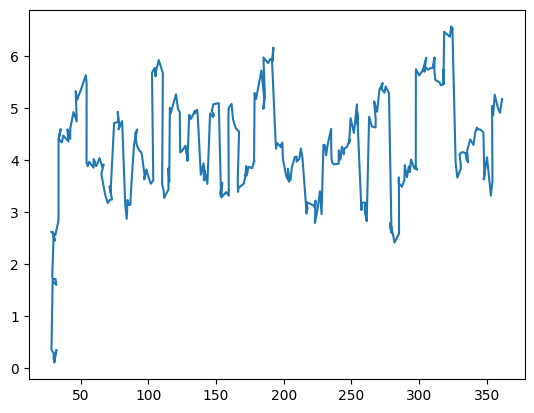

In [126]:
values=irfft(result,axis= 1)
x_train=np.asarray(x_train)
values2=values.flatten()
plt.plot(flat_x, values2)

In [127]:
m1_real2=mogptk.LoadModel("first_real2")
m2_real2=mogptk.LoadModel('second_real2')
m3_real2=mogptk.LoadModel('third_real2')
m4_real2=mogptk.LoadModel('fourth_real2')
m1_im2=mogptk.LoadModel('first_im2')
m2_im2=mogptk.LoadModel('second_im2')
m3_im2=mogptk.LoadModel('third_im2')
m4_im2=mogptk.LoadModel('fourth_im2')

In [128]:
_,real_k,_,_=m1_real2.predict(x_train_real)
_,real2_k,_,_=m2_real2.predict(x_train_real)
_,real3_k,_,_=m3_real2.predict(x_train_real)
_,real4_k,_,_=m4_real2.predict(x_train_real)

_,im1_k,_,_=m1_im2.predict(x_train_imag)
_,im2_k,_,_=m2_im2.predict(x_train_imag)
_,im3_k,_,_=m3_im2.predict(x_train_imag)
_,im4_k,_,_=m4_im2.predict(x_train_imag)

first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real_k,im1_k):
    first.append(r+1j*im)
for r, im in zip(real2_k,im2_k):
    second.append(r+1j*im)
for r, im in zip(real3_k,im3_k):
    third.append(r+1j*im) 
for r, im in zip(real4_k,im4_k):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result)  

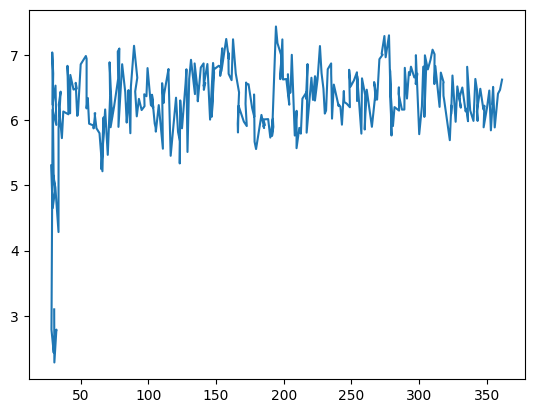

In [129]:
values=irfft(result,axis= 1)
x_train=np.asarray(x_train)
values2=values.flatten()
x_points=x_train.flatten()
plt.plot(flat_x, values2)

In [130]:
torch.tensor(0.45)

tensor(0.4500)

In [131]:
torch.tensor([0.45])

tensor([0.4500])

In [167]:
# third group of experiments
def func1(t):
    return torch.tensor([np.sin(8*np.pi*t)])

def func3(t):
    return torch.tensor([np.sin(8*np.pi*t+np.pi/10)**2 + np.cos(4*np.pi*t)])

In [168]:
num_training_samples=50
length=6

x_train=[]
for i in range(num_training_samples):
    index=i+i*6+12
    x_train.append(np.linspace(index/356, (index+6)/356, 6))

In [145]:
print(x_train)

[array([0.03370787, 0.03707865, 0.04044944, 0.04382022, 0.04719101,
       0.0505618 ]), array([0.05337079, 0.05674157, 0.06011236, 0.06348315, 0.06685393,
       0.07022472]), array([0.07303371, 0.07640449, 0.07977528, 0.08314607, 0.08651685,
       0.08988764]), array([0.09269663, 0.09606742, 0.0994382 , 0.10280899, 0.10617978,
       0.10955056]), array([0.11235955, 0.11573034, 0.11910112, 0.12247191, 0.1258427 ,
       0.12921348]), array([0.13202247, 0.13539326, 0.13876404, 0.14213483, 0.14550562,
       0.1488764 ]), array([0.15168539, 0.15505618, 0.15842697, 0.16179775, 0.16516854,
       0.16853933]), array([0.17134831, 0.1747191 , 0.17808989, 0.18146067, 0.18483146,
       0.18820225]), array([0.19101124, 0.19438202, 0.19775281, 0.2011236 , 0.20449438,
       0.20786517]), array([0.21067416, 0.21404494, 0.21741573, 0.22078652, 0.2241573 ,
       0.22752809]), array([0.23033708, 0.23370787, 0.23707865, 0.24044944, 0.24382022,
       0.24719101]), array([0.25      , 0.25337079, 

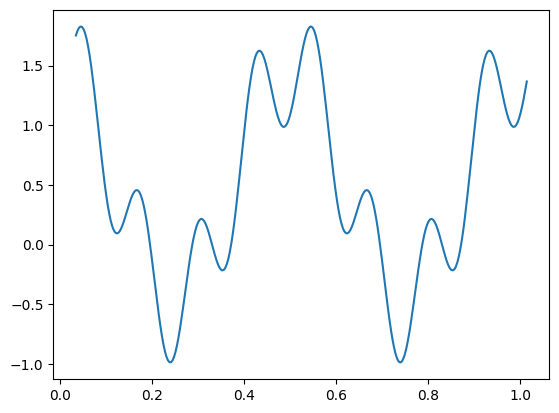

In [169]:
f1=[]
f2=[]
for i in x_train:
    values1=[]
    values2=[]
    for index in i:
        values1.append(func1(index).item())
        values2.append(func3(index).item())
    f1.append(values1)
    f2.append(values2)
    
flat_x=[   x for xs in f1 for x in xs  ]
flat_y=[ x for xs in f2 for x in xs  ]
x_points=np.asarray(x_train).flatten()
plt.plot(x_points, flat_y)

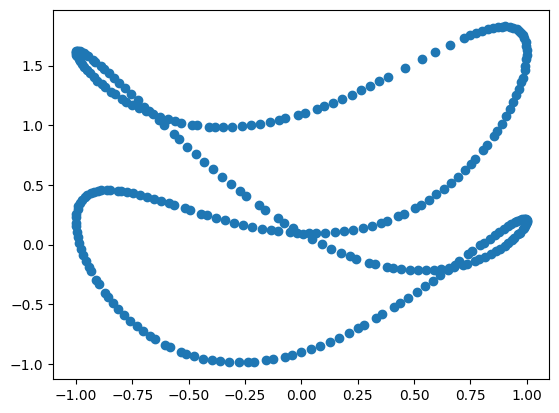

In [148]:
plt.scatter(flat_x, flat_y)

In [137]:
flat_x

[-1.175660927181459e-14,
 -0.9510565162951575,
 -0.5877852522924617,
 0.5877852522924855,
 0.9510565162951485,
 -1.7634913907721887e-14,
 -4.7036340777443775e-14,
 -0.9510565162951685,
 -0.5877852522924332,
 0.587785252292468,
 0.9510565162951375,
 3.928773447456944e-15,
 3.1370765438543066e-14,
 -0.9510565162951619,
 -0.5877852522924046,
 0.5877852522924966,
 0.9510565162951619,
 -3.135095805817224e-14,
 -3.908966067086117e-15,
 -0.9510565162951375,
 -0.5877852522923761,
 0.5877852522924332,
 0.9510565162951158,
 -6.663068956380142e-14,
 -3.9188697572715304e-14,
 -0.9510565162951133,
 -0.5877852522923476,
 0.5877852522924617,
 0.95105651629514,
 -1.0191042106943061e-13,
 3.9218408643271543e-14,
 -0.9510565162951594,
 -0.587785252292411,
 0.5877852522923983,
 0.951056516295094,
 -2.3503314853443768e-14,
 -1.0974816058397367e-13,
 -0.9510565162951351,
 -0.5877852522924745,
 0.5877852522925188,
 0.9510565162951182,
 -1.7246988408068898e-13,
 -3.134105436798683e-14,
 -0.9510565162951812,


In [138]:
flat_y

[1.095491502812512,
 -0.15450849718744586,
 0.9635254915623892,
 0.40450849718749726,
 0.19098300562504777,
 1.0954915028125085,
 1.0954915028124914,
 -0.15450849718740178,
 0.9635254915623388,
 0.4045084971874744,
 0.19098300562503734,
 1.0954915028125214,
 1.0954915028125374,
 -0.15450849718742865,
 0.9635254915622886,
 0.40450849718751186,
 0.19098300562506043,
 1.0954915028125005,
 1.0954915028125167,
 -0.15450849718752624,
 0.9635254915622382,
 0.4045084971874285,
 0.19098300562501658,
 1.0954915028124799,
 1.0954915028124959,
 -0.15450849718762394,
 0.9635254915621878,
 0.40450849718746595,
 0.19098300562503967,
 1.095491502812459,
 1.095491502812542,
 -0.15450849718743853,
 0.9635254915622997,
 0.40450849718738263,
 0.19098300562499593,
 1.0954915028125052,
 1.0954915028124546,
 -0.154508497187536,
 0.9635254915624114,
 0.40450849718754106,
 0.1909830056250189,
 1.0954915028124175,
 1.0954915028125005,
 -0.1545084971873506,
 0.9635254915621991,
 0.40450849718769943,
 0.190983005

In [170]:
model1_k_real3=mogptk.LoadModel("first_real_kernel3")
model2_k_real3=mogptk.LoadModel("second_real_kernel3")
model3_k_real3=mogptk.LoadModel("third_real_kernel3")
model4_k_real3=mogptk.LoadModel("fourth_real_kernel3")

model1_k_imag3=mogptk.LoadModel("first_im_kernel3")
model2_k_imag3=mogptk.LoadModel("second_im_kernel3")
model3_k_imag3=mogptk.LoadModel("third_im_kernel3")
model4_k_imag3=mogptk.LoadModel("fourth_im_kernel3")

In [172]:
f1_real=[]
f1_imag=[]
f2_real=[]
f2_imag=[]
for i in range(num_training_samples):
    value1=rfft(f1[i])
    value2=rfft(f2[i])
    f1_real.append([i.real for i in value1])
    f1_imag.append([i.imag for i in value1])

    f2_real.append([i.real for i in value2])
    f2_imag.append([i.imag for i in value2])
    
    
x_train_real=torch.tensor(np.asarray(f1_real))
x_train_imag=torch.tensor(np.asarray(f1_imag))


_,real_k,_,_=model1_k_real3.predict(x_train_real)
_,real2_k,_,_=model2_k_real3.predict(x_train_real)
_,real3_k,_,_=model3_k_real3.predict(x_train_real)
_,real4_k,_,_=model4_k_real3.predict(x_train_real)

_,im1_k,_,_=model1_k_imag3.predict(x_train_imag)
_,im2_k,_,_=model2_k_imag3.predict(x_train_imag)
_,im3_k,_,_=model3_k_imag3.predict(x_train_imag)
_,im4_k,_,_=model4_k_imag3.predict(x_train_imag)

In [173]:
first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real_k,im1_k):
    first.append(r+1j*im)
for r, im in zip(real2_k,im2_k):
    second.append(r+1j*im)
for r, im in zip(real3_k,im3_k):
    third.append(r+1j*im) 
for r, im in zip(real4_k,im4_k):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result)    

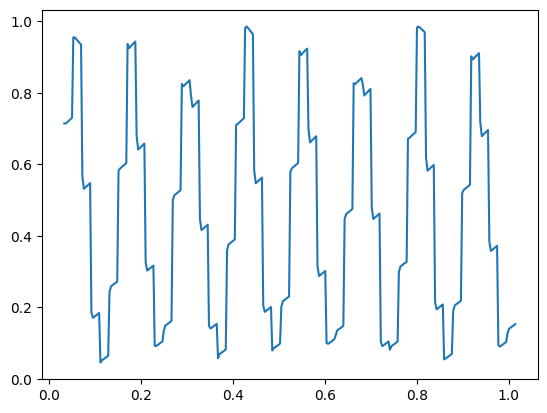

In [174]:
values=irfft(result,axis= 1)
x_train=np.asarray(x_train)
values2=values.flatten()
plt.plot(x_points, values2)

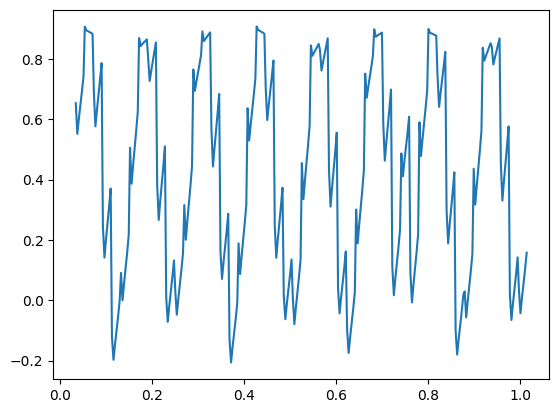

In [154]:
m1_real2=mogptk.LoadModel("first_real3")
m2_real2=mogptk.LoadModel('second_real3')
m3_real2=mogptk.LoadModel('third_real3')
m4_real2=mogptk.LoadModel('fourth_real3')
m1_im2=mogptk.LoadModel('first_im3')
m2_im2=mogptk.LoadModel('second_im3')
m3_im2=mogptk.LoadModel('third_im3')
m4_im2=mogptk.LoadModel('fourth_im3')

_,real_k,_,_=m1_real2.predict(x_train_real)
_,real2_k,_,_=m2_real2.predict(x_train_real)
_,real3_k,_,_=m3_real2.predict(x_train_real)
_,real4_k,_,_=m4_real2.predict(x_train_real)

_,im1_k,_,_=m1_im2.predict(x_train_imag)
_,im2_k,_,_=m2_im2.predict(x_train_imag)
_,im3_k,_,_=m3_im2.predict(x_train_imag)
_,im4_k,_,_=m4_im2.predict(x_train_imag)

first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real_k,im1_k):
    first.append(r+1j*im)
for r, im in zip(real2_k,im2_k):
    second.append(r+1j*im)
for r, im in zip(real3_k,im3_k):
    third.append(r+1j*im) 
for r, im in zip(real4_k,im4_k):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result)  

values=irfft(result,axis= 1)
x_train=np.asarray(x_train)
values2=values.flatten()
plt.plot(x_points, values2)

In [155]:
l=np.asarray([1,2,3,4,5,6,7,8])

In [156]:
rfft(l)

array([36.+0.j        , -4.+9.65685425j, -4.+4.j        , -4.+1.65685425j,
       -4.+0.j        ])

(50, 8) shape
[[6.064164279779634, -0.1941170621561346, -0.16474289526045238, -0.15973077635353533, -0.1586937406279545], [7.748285547374694, -0.09531958552705586, -0.058504467501949486, -0.05222269788549319, -0.05092296425324783], [7.604146666417636, 0.02596918914855237, 0.06153848330776146, 0.0676076777939977, 0.0688634284305274], [5.665758176440003, 0.14113035877911975, 0.16706101460711498, 0.17148556665673784, 0.17240103147917285], [2.3904958939330965, 0.22299086994413084, 0.23316437459232442, 0.23490028135617905, 0.23525945027531714], [-1.4488199913267663, 0.2522351838204464, 0.24425103036305518, 0.24288869295135584, 0.24260681764223702], [-4.9462770438974, 0.22196290763021553, 0.19770501083739567, 0.19356588193583069, 0.1927094727756682]] f1
[[0.0, 0.3710028387859379, 0.1529531139975815, 0.06330427512727815, 0.0], [0.0, 0.10536912294259064, 0.04344046402987822, 0.01797915070004734, 0.0], [0.0, -0.18512714696977897, -0.07632225593522568, -0.03158827539878964, 0.0], [0.0, -0.431941

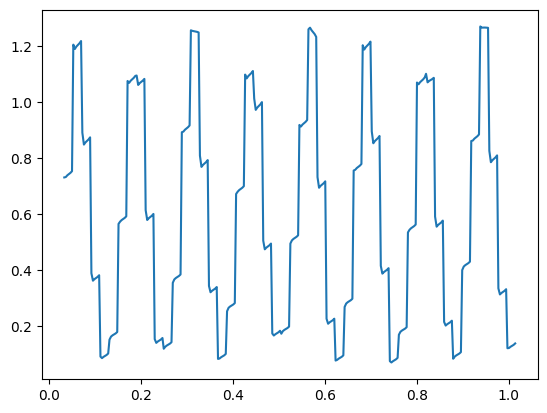

In [164]:
model1_k_real3=mogptk.LoadModel("first_real_kernel3_8")
model2_k_real3=mogptk.LoadModel("second_real_kernel3_8")
model3_k_real3=mogptk.LoadModel("third_real_kernel3_8")
model4_k_real3=mogptk.LoadModel("fourth_real_kernel3_8")

model1_k_imag3=mogptk.LoadModel("first_im_kernel3_8")
model2_k_imag3=mogptk.LoadModel("second_im_kernel3_8")
model3_k_imag3=mogptk.LoadModel("third_im_kernel3_8")
model4_k_imag3=mogptk.LoadModel("fourth_im_kernel3_8")

num_training_samples=50
length=8

x_train=[]
for i in range(num_training_samples):
    index=i+i*8+12
    x_train.append(np.linspace(index/461, (index+8)/461, 8))
print(np.asarray(x_train).shape, "shape")

f1=[]
f2=[]
for i in x_train:
    values1=[]
    values2=[]
    for index in i:
        values1.append(func1(index).item())
        values2.append(func3(index).item())
    f1.append(values1)
    f2.append(values2)
    
f1_real=[]
f1_imag=[]
f2_real=[]
f2_imag=[]
for i in range(num_training_samples):
    value1=rfft(f1[i])
    value2=rfft(f2[i])
    f1_real.append([i.real for i in value1])
    f1_imag.append([i.imag for i in value1])

    f2_real.append([i.real for i in value2])
    f2_imag.append([i.imag for i in value2])
    
    
x_train_real=torch.tensor(np.asarray(f1_real))
print(f1_real[:7], "f1")
print(f1_imag[:7], "f2")
x_train_imag=torch.tensor(np.asarray(f1_imag))


_,real_k,_,_=model1_k_real3.predict(x_train_real)
_,real2_k,_,_=model2_k_real3.predict(x_train_real)
_,real3_k,_,_=model3_k_real3.predict(x_train_real)
_,real4_k,_,_=model4_k_real3.predict(x_train_real)

_,im1_k,_,_=model1_k_imag3.predict(x_train_imag)
_,im2_k,_,_=model2_k_imag3.predict(x_train_imag)
_,im3_k,_,_=model3_k_imag3.predict(x_train_imag)
_,im4_k,_,_=model4_k_imag3.predict(x_train_imag)

first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real_k,im1_k):
    first.append(r+1j*im)
for r, im in zip(real2_k,im2_k):
    second.append(r+1j*im)
for r, im in zip(real3_k,im3_k):
    third.append(r+1j*im) 
for r, im in zip(real4_k,im4_k):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result)    

values=irfft(result,axis= 1)
x_train=np.asarray(x_train)
values2=values.flatten()
plt.plot(x_points, values2)

In [159]:
num_training_samples=50
length=8

x_train=[]
for i in range(num_training_samples):
    index=i+i*8+12
    x_train.append(np.linspace(index, index+8, 8))
    
print(x_train[49])    

[453.         454.14285714 455.28571429 456.42857143 457.57142857
 458.71428571 459.85714286 461.        ]


In [165]:
a=np.asarray([12,3,4,5,6])
a[1:4]

array([3, 4, 5])

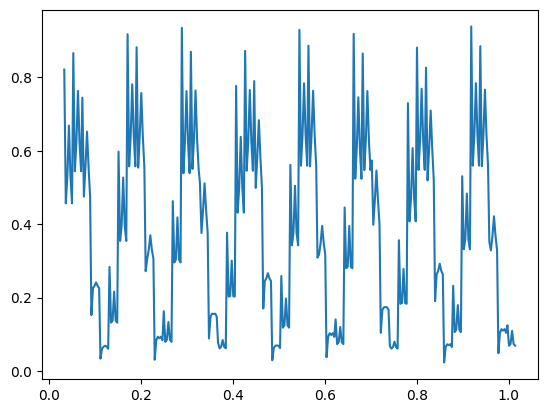

In [175]:

model_lmc_real = mogptk.LoadModel("model_real_convolved2")
model_lmc_imag = mogptk.LoadModel("model_imag_convolved2")
_,real_lmc,_,_=model_lmc_real.predict(x_train_real)
_,imag_lmc,_,_=model_lmc_imag.predict(x_train_imag)
result=[]
for r1, im1, r2,im2, r3,im3,r4,im4 in zip(real_lmc[0], imag_lmc[0], real_lmc[1], imag_lmc[1],real_lmc[2], imag_lmc[2], real_lmc[3], imag_lmc[3]):
    result.append([r1+1j*im1, r2+ 1j*im2, r3+1j*im3, r4+ 1j*im4])
    
prediction=irfft(np.asarray(result), axis=1)
prediction_flat=prediction.flatten()
plt.plot(x_points, prediction_flat)

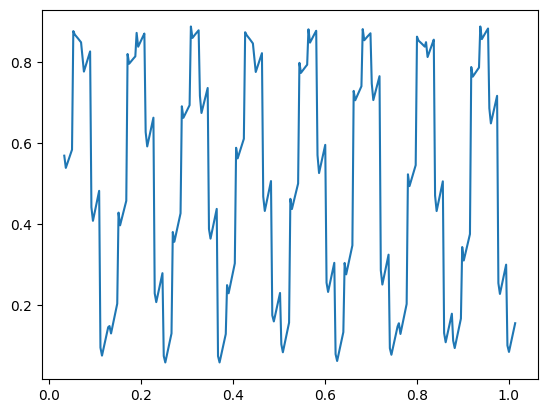

In [178]:
model1_k_real3=mogptk.LoadModel("first_real_kernel3_2")
model2_k_real3=mogptk.LoadModel("second_real_kernel3_2")
model3_k_real3=mogptk.LoadModel("third_real_kernel3_2")
model4_k_real3=mogptk.LoadModel("fourth_real_kernel3_2")

model1_k_imag3=mogptk.LoadModel("first_im_kernel3_2")
model2_k_imag3=mogptk.LoadModel("second_im_kernel3_2")
model3_k_imag3=mogptk.LoadModel("third_im_kernel3_2")
model4_k_imag3=mogptk.LoadModel("fourth_im_kernel3_2")





_,real_k,_,_=model1_k_real3.predict(x_train_real)
_,real2_k,_,_=model2_k_real3.predict(x_train_real)
_,real3_k,_,_=model3_k_real3.predict(x_train_real)
_,real4_k,_,_=model4_k_real3.predict(x_train_real)

_,im1_k,_,_=model1_k_imag3.predict(x_train_imag)
_,im2_k,_,_=model2_k_imag3.predict(x_train_imag)
_,im3_k,_,_=model3_k_imag3.predict(x_train_imag)
_,im4_k,_,_=model4_k_imag3.predict(x_train_imag)

first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real_k,im1_k):
    first.append(r+1j*im)
for r, im in zip(real2_k,im2_k):
    second.append(r+1j*im)
for r, im in zip(real3_k,im3_k):
    third.append(r+1j*im) 
for r, im in zip(real4_k,im4_k):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result)    

values=irfft(result,axis= 1)
x_train=np.asarray(x_train)
values2=values.flatten()
plt.plot(x_points, values2)